In [1]:
import os
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy import stats

# Homepage Optimization 
1. [$2^k$ Factorial Experiment](#2k)
2. [Central Composite Design 1](#ccd1)
3. [Central Composite Design 2](#ccd2) 
4. ['Radial' Search](#radial)

### <a id='2k'>$2^k$ Factorial Experiment</a>
|Factor|Low (-)|High (+)|
|---|---|---|
|Preview length| 50 s|100 s|
|Match score| 20% | 80% |
|Tile size|0.1|0.5|
|Preview type| actual content | teaser/trailer|
    
Results 
- All preview length, match score, and preview type are significant. Tile size is insignificant
    - Tile size can be ignored in following explorations 
- The interaction between preview length and match score is the only significant interaction
    - Thus, the main effect of preview type is independent. From this, we can conclude that teaser/trailer (coded as 1) is the more optimal level because the coefficient is negative, both bounds of the 95% CI are also negative, and there are only two conditions for preview type. Therefore, the expected difference (all else equal) from switching from actual content to teaser/trailer is -2.5070 * 2.   

Follow up
- Have found the optimal level of preview type and eliminated tile size 
- Search the preview length x match score space for the optimal levels

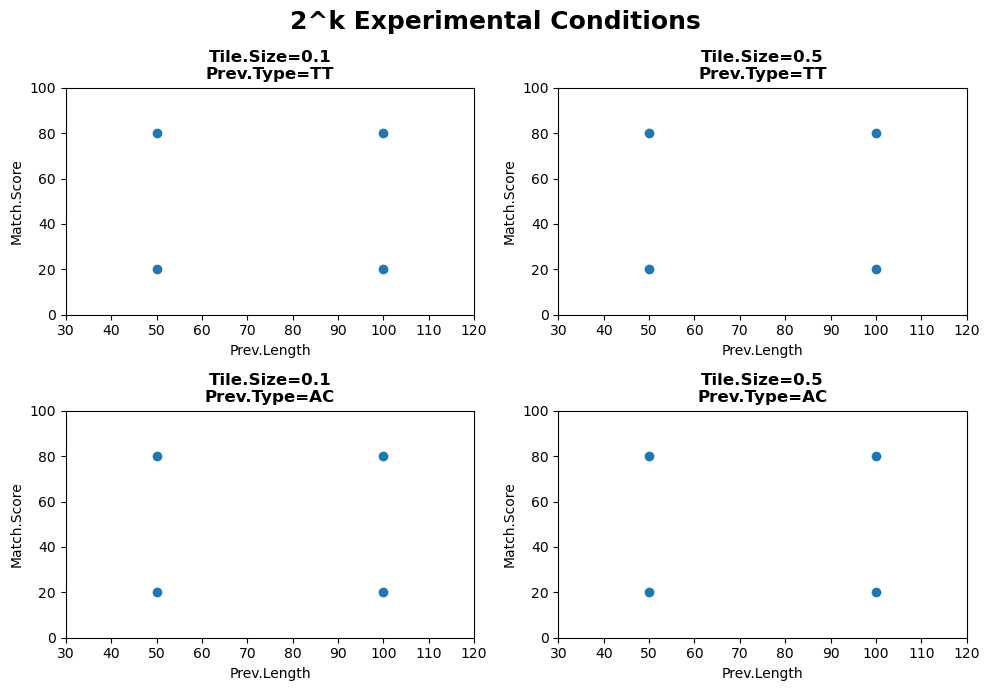

In [2]:
### Plotting experimental design

pts = [(50, 20), (50, 80), (100, 20), (100,80)]
x = [50, 50, 100, 100] ## Prev.Time
y = [20, 80, 20, 80] ## Match.Score

fig, axs = plt.subplots(2, 2, figsize=(10, 7))
fig.suptitle('2^k Experimental Conditions', size=18, weight='bold')
axs[0][0].scatter(x, y)
axs[0][0].set_xlim(30, 120)
axs[0][0].set_ylim(0, 100)
axs[0][0].set_title('Tile.Size=0.1\nPrev.Type=TT', weight='bold')
axs[0][0].set_xlabel('Prev.Length')
axs[0][0].set_ylabel('Match.Score')

axs[0][1].scatter(x, y)
axs[0][1].set_xlim(30, 120)
axs[0][1].set_ylim(0, 100)
axs[0][1].set_title('Tile.Size=0.5\nPrev.Type=TT', weight='bold')
axs[0][1].set_xlabel('Prev.Length')
axs[0][1].set_ylabel('Match.Score')

axs[1][0].scatter(x, y)
axs[1][0].set_xlim(30, 120)
axs[1][0].set_ylim(0, 100)
axs[1][0].set_title('Tile.Size=0.1\nPrev.Type=AC', weight='bold')
axs[1][0].set_xlabel('Prev.Length')
axs[1][0].set_ylabel('Match.Score')

axs[1][1].scatter(x, y)
axs[1][1].set_xlim(30, 120)
axs[1][1].set_ylim(0, 100)
axs[1][1].set_title('Tile.Size=0.5\nPrev.Type=AC', weight='bold')
axs[1][1].set_xlabel('Prev.Length')
axs[1][1].set_ylabel('Match.Score')

fig.tight_layout()
#plt.show()

#plt.savefig('2k_test.png')

In [3]:
### Reading in data 

data = pd.read_csv('data/RESULTS_Arjachar_CumCondCount=16_2024-01-18.csv')
data.columns = [col.replace('.', '_') for col in data.columns]

data.head()

,Prev_Length,Match_Score,Tile_Size,Prev_Type,Browse_Time
0,50,20,0.1,TT,20.980132
1,100,20,0.1,TT,18.524368
2,50,80,0.1,TT,9.956104
3,100,80,0.1,TT,16.479225
4,50,20,0.5,TT,20.420752


In [4]:
### Encoding high and low levels

map1 = {50: -1, 100:1}
map2 = {20:-1, 80:1}
map3 = {0.1:-1, 0.5:1}
map4 = {'AC':-1, 'TT':1} 

coded = data.copy()
coded['Prev_Length'] = coded['Prev_Length'].map(map1)
coded['Match_Score'] = coded['Match_Score'].map(map2)
coded['Tile_Size'] = coded['Tile_Size'].map(map3)
coded['Prev_Type'] = coded['Prev_Type'].map(map4)

coded.head()

,Prev_Length,Match_Score,Tile_Size,Prev_Type,Browse_Time
0,-1,-1,-1,1,20.980132
1,1,-1,-1,1,18.524368
2,-1,1,-1,1,9.956104
3,1,1,-1,1,16.479225
4,-1,-1,1,1,20.420752


In [5]:
### Fitting full model with all interactions 
### Significant factors/interactions: preview length, match score, preview type, (preview length x match score) 

model = smf.ols('Browse_Time ~ Prev_Length * Match_Score * Tile_Size * Prev_Type'
                , data = coded).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Browse_Time   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     1752.
Date:                Sun, 28 Jan 2024   Prob (F-statistic):               0.00
Time:                        20:52:58   Log-Likelihood:                -2274.0
No. Observations:                1600   AIC:                             4580.
Df Residuals:                    1584   BIC:                             4666.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                      19.3730      0.025    769.249      0.000      19.324      19.422
Prev_Length                                     1.0054      0.025     39.920      0.000       0.956       1.055
Match_Score                                    -2.8447      0.025   -112.954      0.000      -2.894      -2.795
Prev_Length:Match_Score                         1.1289      0.025     44.825      0.000       1.079       1.178
Tile_Size                                      -0.0032      0.025     -0.129      0.898      -0.053       0.046
Prev_Length:Tile_Size                           0.0176      0.025      0.700      0.484      -0.032       0.067
Match_Score:Tile_Size                           0.0263      0.025      1.044      0.297      -0.023       0.076
Prev_Length:Match_Score:Tile_Size              -0.0166      0.025     -0.658      0.510      -0.066       0.033
Prev_Type                                      -2.5070      0.025    -99.547      0.000      -2.556      -2.458
Prev_Length:Prev_Type                           0.0094      0.025      0.372      0.710      -0.040       0.059
Match_Score:Prev_Type                           0.0038      0.025      0.151      0.880      -0.046       0.053
Prev_Length:Match_Score:Prev_Type              -0.0300      0.025     -1.190      0.234      -0.079       0.019
Tile_Size:Prev_Type                             0.0098      0.025      0.388      0.698      -0.040       0.059
Prev_Length:Tile_Size:Prev_Type                -0.0235      0.025     -0.933      0.351      -0.073       0.026
Match_Score:Tile_Size:Prev_Type                 0.0099      0.025      0.393      0.694      -0.039       0.059
Prev_Length:Match_Score:Tile_Size:Prev_Type    -0.0245      0.025     -0.974      0.330      -0.074       0.025
==============================================================================
Omnibus:                        0.238   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.888   Jarque-Bera (JB):                0.233
Skew:                          -0.030   Prob(JB):                        0.890
Kurtosis:                       2.996   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
### Fitting reduced significant model 

model_red = smf.ols('Browse_Time ~ Prev_Length + Match_Score + Prev_Type + Prev_Length:Match_Score'
                    , data=coded).fit()
model_red.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Browse_Time   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     6590.
Date:                Sun, 28 Jan 2024   Prob (F-statistic):               0.00
Time:                        20:52:58   Log-Likelihood:                -2276.9
No. Observations:                1600   AIC:                             4564.
Df Residuals:                    1595   BIC:                             4591.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  19.3730      0.025    770.523      0.000      19.324      19.422
Prev_Length                 1.0054      0.025     39.987      0.000       0.956       1.055
Match_Score                -2.8447      0.025   -113.141      0.000      -2.894      -2.795
Prev_Type                  -2.5070      0.025    -99.711      0.000      -2.556      -2.458
Prev_Length:Match_Score     1.1289      0.025     44.899      0.000       1.080       1.178
==============================================================================
Omnibus:                        0.148   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.928   Jarque-Bera (JB):                0.144
Skew:                          -0.023   Prob(JB):                        0.931
Kurtosis:                       2.997   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
### Running partial F-test
### High p-value, fail to reject that the models are equal 
sm.stats.anova_lm(model_red, model)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,1595.0,1613.257767,0.0,NaN,NaN,NaN
1,1584.0,1607.441051,11.0,5.816716,0.521081,0.890275


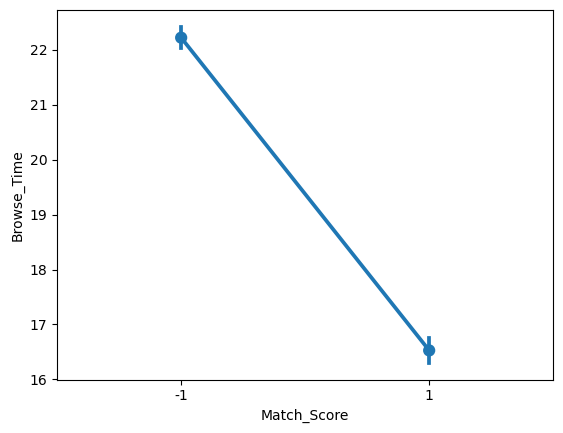

In [8]:
fig1 = sns.pointplot(x='Match_Score', y='Browse_Time', data=coded)

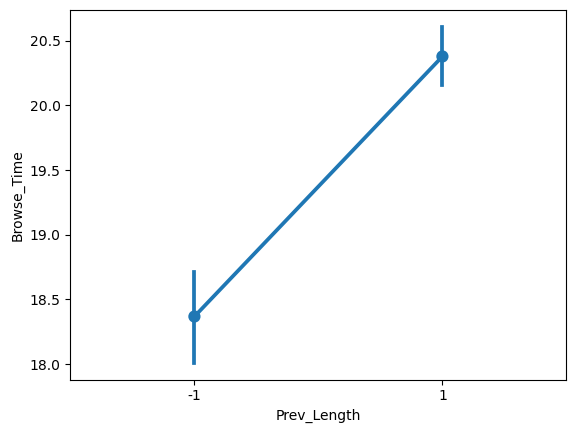

In [9]:
fig2 = sns.pointplot(x='Prev_Length', y='Browse_Time', data=coded)

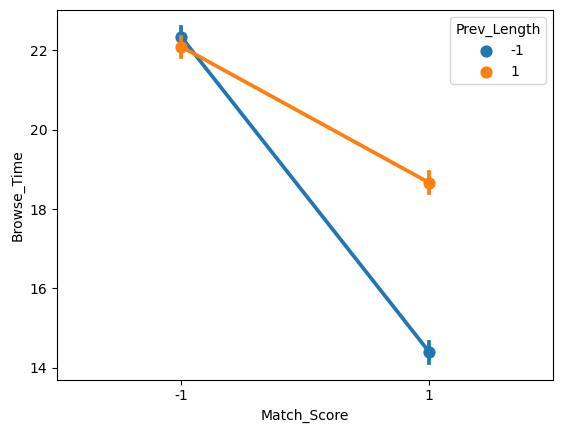

In [10]:
fig12 = sns.pointplot(x="Match_Score", hue="Prev_Length", y="Browse_Time", data=coded)


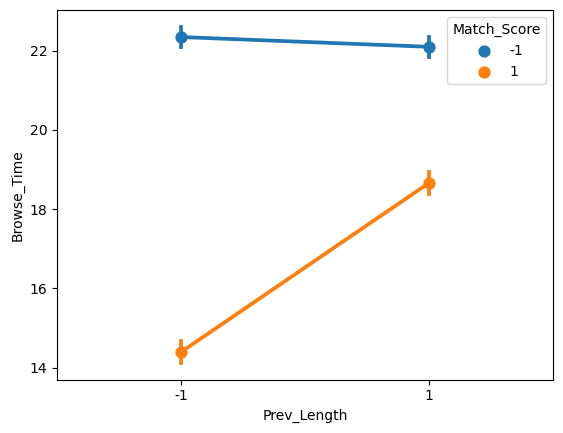

In [11]:
fig21 = sns.pointplot(x="Prev_Length", hue="Match_Score", y="Browse_Time", data=coded)


In [12]:
coded.groupby(['Match_Score', 'Prev_Length']).mean()

Tile_Size  Prev_Type  Browse_Time
Match_Score Prev_Length                                   
-1          -1                 0.0        0.0    22.341193
             1                 0.0        0.0    22.094151
 1          -1                 0.0        0.0    14.394087
             1                 0.0        0.0    18.662601

### <a id='ccd1'>Central Composite Design 1</a>
|Factor|Low|Center|High| 
|---|---|---|---|
|Preview length| 30|40|50|
|Match score|60|80|100|
- Axial conditions: $a=1$

Results
- Projected Minimum: (60.3656 preview length, 82.7705 match score)

Follow up
- The estimated optimum lies outside any data we have colllected so far, so estimate may be off
- To conduct another central composite design around the estimated optimum to verify

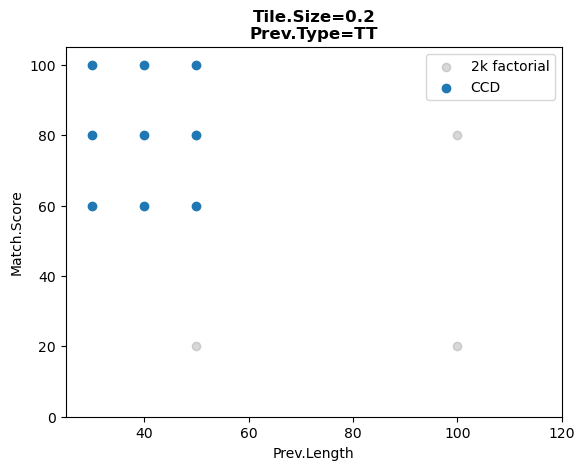

In [13]:
x2 = [30,40,50,30,40,50,30,40,50]
y2 = [60,60,60,80,80,80,100,100,100]
plt.scatter(x, y, color='gray', alpha=0.3, label='2k factorial')
plt.scatter(x2, y2, label='CCD')
plt.xlim(25, 120)
plt.ylim(0, 105)
plt.title('Tile.Size=0.2\nPrev.Type=TT', weight='bold')
plt.xlabel('Prev.Length')
plt.ylabel('Match.Score')
plt.legend()
#plt.savefig('cdd1.png')

In [14]:
def convertNtoC(U, UH, UL):
    """
    Converts natural units to coded units based on the low and high values in natural units
    
    Params: 
    U: Measure in natural units to be converted 
    UH: Measure in natural units of the high value 
    UL: Measure in natural units of the low value
    """
    x = (U - (UH+UL)/2) / ((UH-UL)/2)  
    return x

def convertCtoN(x, UH, UL):
    """
    Converts coded units to natural units based on the low and high values in natural units 
    
    Params: 
    U: Measure in coded units to be converted 
    UH: Measure in natural units of the high value 
    UL: Measure in natural units of the low value
    """
    U = x*(UH-UL)/2 + (UH+UL)/2
    return U

In [15]:
### Reading in data 
ccd_df = pd.read_csv('data/RESULTS_Arjachar_CumCondCount=24_2024-01-18.csv')
ccd_df_sup = pd.read_csv('data/RESULTS_Arjachar_CumCondCount=25_2024-01-18.csv')

ccd_coded = pd.concat([ccd_df.copy(), ccd_df_sup])
ccd_coded.columns = data.columns

ccd_coded.groupby(['Prev_Length', 'Match_Score']).mean()

/var/folders/jk/pgjk_zys001_s284g_c6wyww0000gn/T/ipykernel_31852/3441034709.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ccd_coded.groupby(['Prev_Length', 'Match_Score']).mean()


Tile_Size  Browse_Time
Prev_Length Match_Score                        
30          60                 0.2    16.387877
            80                 0.2    15.411019
            100                0.2    16.734884
40          60                 0.2    15.638062
            80                 0.2    13.325672
            100                0.2    15.356145
50          60                 0.2    15.286589
            80                 0.2    11.866824
            100                0.2    14.653954

In [16]:
### Encoding low, center, and high values

prev_len_U = [convertNtoC(U=pl, UH=50, UL=30) for pl in ccd_coded['Prev_Length']]
match_score_U = [convertNtoC(U=ms, UH=100, UL=60) for ms in ccd_coded['Match_Score']]

relevant = pd.DataFrame()
relevant['Prev_Length'] = prev_len_U
relevant['Match_Score'] = match_score_U
relevant['Browse_Time'] = list(ccd_coded['Browse_Time'])
relevant.head()

,Prev_Length,Match_Score,Browse_Time
0,-1.0,-1.0,16.578381
1,0.0,-1.0,16.474600
2,1.0,-1.0,14.901396
3,-1.0,0.0,15.467379
4,0.0,0.0,13.475149


In [17]:
relevant.groupby(['Prev_Length', 'Match_Score']).mean()

Browse_Time
Prev_Length Match_Score             
-1.0        -1.0           16.387877
             0.0           15.411019
             1.0           16.734884
 0.0        -1.0           15.638062
             0.0           13.325672
             1.0           15.356145
 1.0        -1.0           15.286589
             0.0           11.866824
             1.0           14.653954

In [18]:
### Fitting quadratic model
### All terms are significant at 5% significance 

model_ccd = smf.ols('Browse_Time ~ Prev_Length + Match_Score + Prev_Length:Match_Score + I(Prev_Length**2) + I(Match_Score**2)',
                    data=relevant).fit()
model_ccd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Browse_Time   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     310.4
Date:                Sun, 28 Jan 2024   Prob (F-statistic):          1.51e-192
Time:                        20:52:59   Log-Likelihood:                -1319.5
No. Observations:                 900   AIC:                             2651.
Df Residuals:                     894   BIC:                             2680.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  13.3455      0.078    170.222      0.000      13.192      13.499
Prev_Length                -1.1211      0.043    -26.107      0.000      -1.205      -1.037
Match_Score                -0.0946      0.043     -2.203      0.028      -0.179      -0.010
Prev_Length:Match_Score    -0.2449      0.053     -4.657      0.000      -0.348      -0.142
I(Prev_Length ** 2)         0.2836      0.074      3.813      0.000       0.138       0.430
I(Match_Score ** 2)         2.1417      0.074     28.796      0.000       1.996       2.288
==============================================================================
Omnibus:                        0.010   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.995   Jarque-Bera (JB):                0.046
Skew:                          -0.001   Prob(JB):                        0.977
Kurtosis:                       2.965   Cond. No.                         4.24
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
### Solving for the stationary point 

b = np.matrix([beta1, beta2]).transpose()
B = np.matrix([[beta11, 0.5*beta12], [0.5*beta12, beta22]])
x_s = -0.5* np.matmul(np.linalg.inv(B), b)
x_s

NameError: name 'beta1' is not defined

In [ ]:
### Converting the stationary point to natural units

xsN_1 = convertCtoN(x = x_s[0], UH = 50, UL = 30)
xsN_2 = convertCtoN(x = x_s[1], UH = 100, UL = 60)
float(xsN_1), float(xsN_2)

In [ ]:
### Plotting the estimated quadratic response curve 

beta0 = model_ccd.params[0]
beta1 = model_ccd.params[1]
beta2 = model_ccd.params[2]
beta12 = model_ccd.params[3]
beta11 = model_ccd.params[4]
beta22 = model_ccd.params[5]

x1, x2 = np.meshgrid(np.linspace(convertNtoC(U = 30, UH = 50, UL = 30), 
                                 convertNtoC(U = 120, UH = 50, UL = 30), 100), 
                     np.linspace(convertNtoC(U = 0, UH = 100, UL = 60), 
                                 convertNtoC(U = 100, UH = 100, UL = 60), 100))
eta = beta0 + beta1*x1 + beta2*x2 + beta12*x1*x2 + beta11*x1**2 + beta22*x2**2
h = plt.contour(x1, x2, eta, levels=20)
plt.clabel(h, inline=True, fontsize=10)
plt.scatter(float(x_s[0]), float(x_s[1]))
plt.xlabel('Prev.Length (coded)')
plt.ylabel('Match.Score (coded)')
plt.title('Predicted Browsing Time')
plt.savefig('cdd1_contour.png')

In [ ]:
h = plt.contour(convertCtoN(x1, UH=50, UL=30),
                convertCtoN(x2, UH=100, UL=60), eta, levels=20)
plt.clabel(h, inline=True, fontsize=10)
plt.scatter(float(xsN_1), float(xsN_2))
plt.xlabel('Prev.Length (natural)')
plt.ylabel('Match.Score (natural)')
plt.title('Predicted Browsing Time')
#plt.savefig('cdd1_contour.png')

### <a id='ccd2'> CDD 2</a>
|Factor|Low|Center|High| 
|---|---|---|---|
|Preview length| 40|60|80|
|Match score|70|80|90|
- Axial conditions: $a=1$

Results
- Projected minimum:

- Chose experimental conditions to fit the lowest contour on the contour plot from the first central composite design experiement, to gain more information in this region. 

In [ ]:
x2 = [30,40,50,30,40,50,30,40,50]
y2 = [60,60,60,80,80,80,100,100,100]
x3 = [40, 60, 80, 40, 60, 80, 40, 60, 80]
y3 = [70, 70, 70, 80,80,80, 90,90,90]
plt.scatter(x, y, color='gray', alpha=0.3, label='2k factorial')
plt.scatter(x2, y2,color='gray', label='CCD')
plt.scatter(x3, y3, label='CCD 2')
plt.xlim(25, 120)
plt.ylim(0, 105)
plt.title('Tile.Size=0.2\nPrev.Type=TT', weight='bold')
plt.xlabel('Prev.Length')
plt.ylabel('Match.Score')
plt.legend()
plt.savefig('cdd2.png')

In [ ]:
convertCtoN(2, UH=50, UL=30), convertCtoN(0, UH=100, UL=60)

In [ ]:
### Read in data

ccd_df2 = pd.read_csv('data/RESULTS_Arjachar_CumCondCount=34_2024-01-19.csv')
ccd_df2.columns = data.columns
ccd_df2.groupby(['Prev_Length', 'Match_Score']).mean()

In [ ]:
### Encoding

prev_lenU2 = [convertNtoC(U=pl, UH=80, UL=40) for pl in ccd_df2['Prev_Length']]
match_scoreU2 = [convertNtoC(U=ms, UH=90, UL=70) for ms in ccd_df2['Match_Score']]

relevant2 = pd.DataFrame()
relevant2['Prev_Length'] = prev_lenU2
relevant2['Match_Score'] = match_scoreU2
relevant2['Browse_Time'] = list(ccd_df2['Browse_Time'])
relevant2.head()

In [ ]:
relevant2.groupby(['Prev_Length', 'Match_Score']).mean()

In [ ]:
### Fitting quadratic model 
### All terms are significant

model_ccd2 = smf.ols('Browse_Time ~ Prev_Length + Match_Score + Prev_Length:Match_Score + I(Prev_Length**2) + I(Match_Score**2)',
                    data=relevant2).fit()
model_ccd2.summary()

In [ ]:
### Solving for stationary point 

b = np.matrix([beta1, beta2]).transpose()
B = np.matrix([[beta11, 0.5*beta12], [0.5*beta12, beta22]])
x_s = -0.5* np.matmul(np.linalg.inv(B), b)
x_s

In [ ]:
### Converting to natural units

xsN_1 = convertCtoN(x = x_s[0], UH = 80, UL = 40)
xsN_2 = convertCtoN(x = x_s[1], UH = 90, UL = 70)
xsN_1, xsN_2

In [ ]:
### Plotting the estimated quadratic response curve

beta0 = model_ccd2.params[0]
beta1 = model_ccd2.params[1]
beta2 = model_ccd2.params[2]
beta12 = model_ccd2.params[3]
beta11 = model_ccd2.params[4]
beta22 = model_ccd2.params[5]

x1, x2 = np.meshgrid(np.linspace(convertNtoC(U = 30, UH = 80, UL = 40), 
                                 convertNtoC(U = 120, UH = 80, UL = 40), 100), 
                     np.linspace(convertNtoC(U = 0, UH = 90, UL = 70), 
                                 convertNtoC(U = 100, UH = 90, UL = 70), 100))
eta = beta0 + beta1*x1 + beta2*x2 + beta12*x1*x2 + beta11*x1**2 + beta22*x2**2
h = plt.contour(x1, x2, eta, levels=20)
plt.clabel(h, inline=True, fontsize=10)
plt.scatter(float(x_s[0]), float(x_s[1]))
plt.xlabel('Prev.Length (coded)')
plt.ylabel('Match.Score (coded)')
plt.title('Predicted Browsing Time')
plt.savefig('cdd2_contour.png')

In [ ]:
h = plt.contour(convertCtoN(x1, UH=80, UL=40),
                convertCtoN(x2, UH=90, UL=70), eta, levels=20)
plt.clabel(h, inline=True, fontsize=10)
plt.scatter(83.48859044, 67.34582413)
plt.xlabel('Prev.Length (natural)')
plt.ylabel('Match.Score (natural)')
plt.title('Predicted Browsing Time')
#plt.savefig('cdd1_contour.png')

### <a id='radial'>'Radial' Search</a>
Since we had restrictions on data collection, I used the remaining experimental conditions to search around our predicted optimum
|Preview length|$x_1$|Match score|$x_2$|Avg. Browsing Time|
|---|---|---|---|---|
|75|-1|55|-1|14.5400|
|75|-1|75|1|10.0831|
|85|0|65|0|11.8598|
|85|0|79|1.4|12.5413|
|95|1|55|-1|14.5224|
|95|1|75|1||14.0991

In [ ]:
### Convert 
convertCtoN(-3, UH = 80, UL = 40)
convertCtoN(1.4, UH = 75, UL = 55)

In [ ]:
x2 = [30,40,50,30,40,50,30,40,50]
y2 = [60,60,60,80,80,80,100,100,100]
x3 = [40, 60, 80, 40, 60, 80, 40, 60, 80]
y3 = [70, 70, 70, 80,80,80, 90,90,90]
x4 = [75, 75, 85, 85, 95,95]
y4 = [55, 75, 65, 79, 55, 75]
plt.scatter(x, y, color='gray', alpha=0.3, label='2k factorial')
plt.scatter(x2, y2,color='gray', label='CCD')
plt.scatter(x3, y3, color='gray', label='CCD 2')
plt.scatter(x4, y4, label='2k with axial')
plt.xlim(25, 120)
plt.ylim(0, 105)
plt.title('Tile.Size=0.2\nPrev.Type=TT', weight='bold')
plt.xlabel('Prev.Length')
plt.ylabel('Match.Score')
plt.legend()
#plt.savefig('cdd2.png')

In [ ]:
convertCtoN(1.4, UH=75, UL=55)

In [ ]:
last = pd.read_csv('data/RESULTS_Arjachar_CumCondCount=1631_2024-01-22.csv')
last.columns = data.columns

In [ ]:
last.groupby(['Prev_Length', 'Match_Score']).mean()